# COGS 108 - EDA Checkpoint

# Names
- Jeffrey Wang
- Justin Bui
- Naasik Jahan
- Samantha Prestrelski
- Thuan Do

<a id='research_question'></a>
# Research Question

Is increased availability of public transportation and walkability in cities an effective way of reducing smog pollution? In measurable terms, do US states with 
1. higher walkability indices
2. more public transportation infrastructure, and 
3. high public transportation ridership numbers 

have less smog pollution, thus indicating that people choose to use these resources?

# Setup

In [11]:
import pandas as pd 
import plotly.express as px
from IPython.display import Image

walkability_df = pd.read_csv("walkability_by_state.csv")
ridership_df = pd.read_csv("ridership.csv")

# Data Cleaning

We exported our dataframes as .csvs to for convenience. Data cleaning steps, as summarized below, can be found in the Data Checkpoint.

If running this notebook locally, you will see two images for each chloropleth map: one interactive, and one generated by the Python Image library so it shows up on the GitHub notebook preview.

Greenhouse Gas Dataset
- Kept only the row showing gross total emissions for each csv of every state.
- Combined the separate csv files for all 51 states into one main csv file as 'Greenhouse.csv' (Done in Data Cleaning Checkpoint).
- Read in 'Greenhouse.csv' file.

Ridership
- Removed irrelevant columns
- Filtered to 50 continental US States
- Combined cities into one observation for entire state by summing travel data

Walkability
- Removed irrelevant columns
- Replaced FIPS codes with state abbreviations
- Filtered to positive values only, as not all observations have all metrics available
- Combined cities into one observation for entire state by averaging values

Commute



# Data Analysis & Results (EDA)

### Greenhouse

For our EDA for the greenhouse, we will generate a line plot showing the progression of gross total carbon emission for all 51 states from the time period 1990-2020.

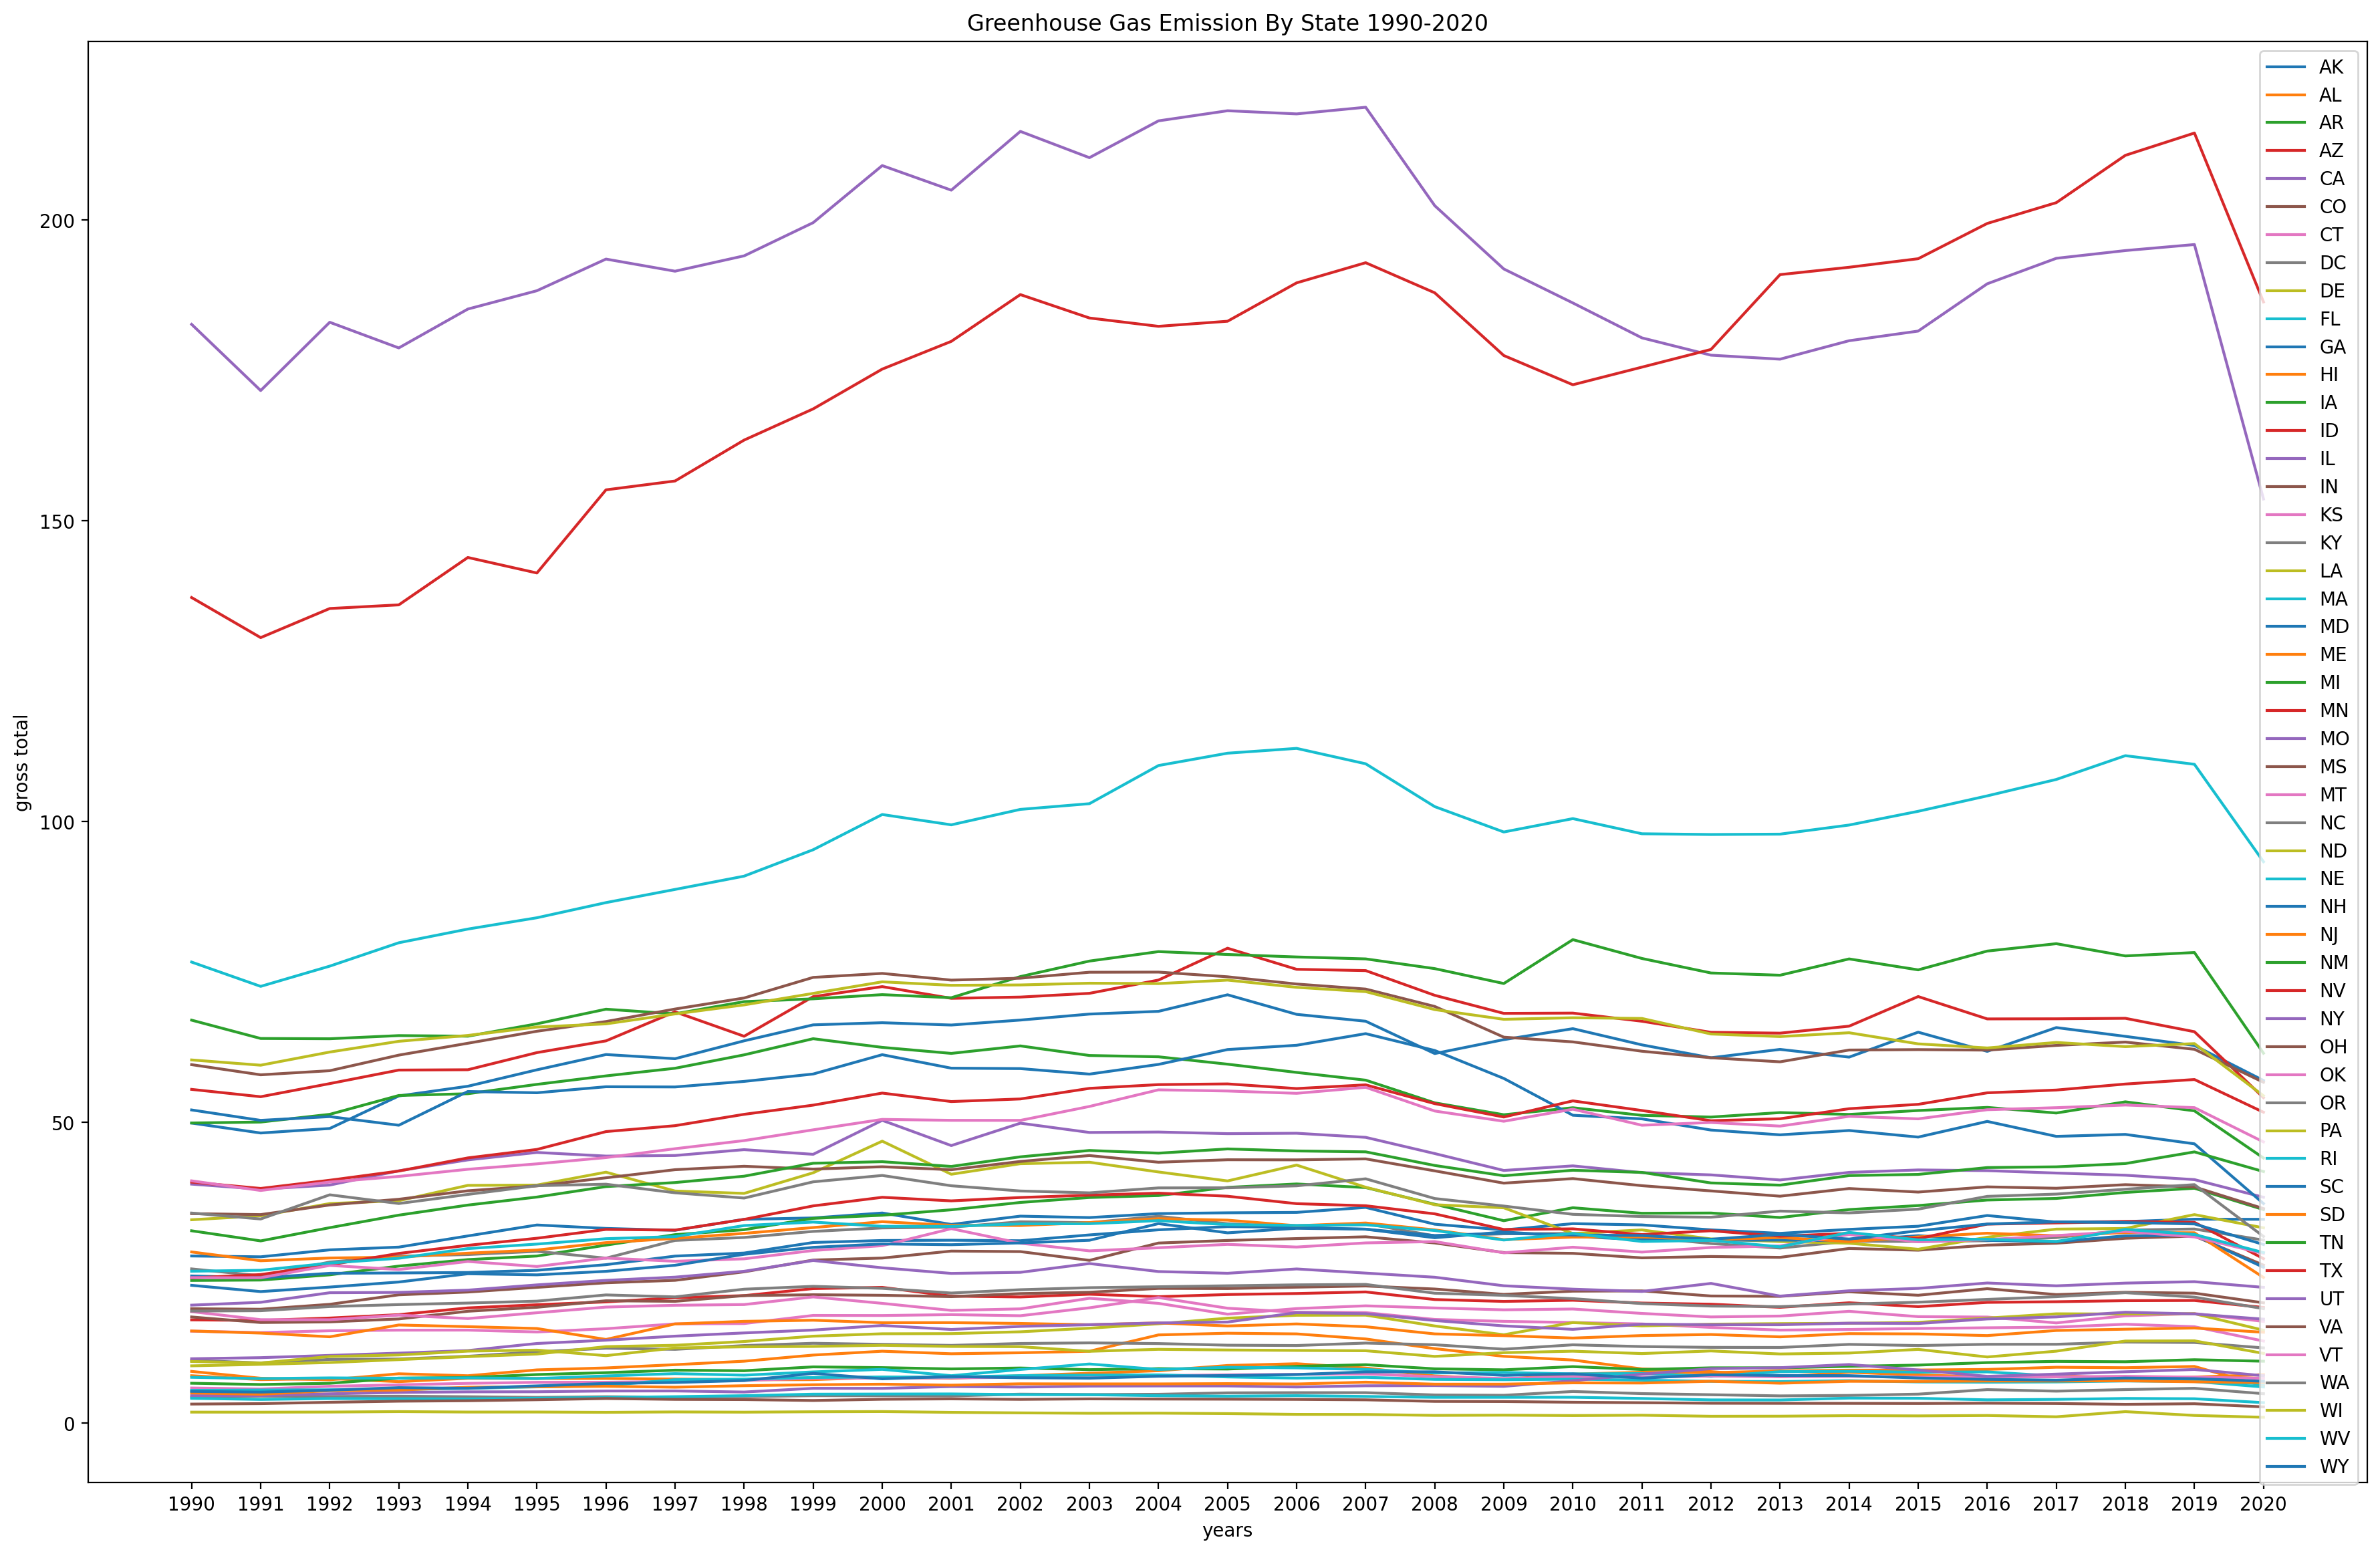

In [12]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

greenhouse = pd.read_csv('Greenhouse.csv', index_col = 0)

greenhouse
plt.subplots(figsize=(22,14), dpi=200)
for index, row in greenhouse.iterrows():
    plt.plot(row, label=index)
    

plt.legend()
plt.xlabel('years')
plt.ylabel('gross total')
plt.title('Greenhouse Gas Emission By State 1990-2020')


plt.show()

As we can see from the line plot, we can see that there seems to be a steady increase in carbon emission throughout all states from 1990 to 2007. However, from 2007 to 2010 there was a decline in carbon emissions. This can most likely be attributed to the 2008 financial crisis, where the economic downturn led to less travel. From 2010 to 2019, carbon emissions again began to rise. From 2019 onward, there seems to be a decline yet again in carbon emissions. This can be attributed to the outbreak of the COVID-19 pandemic, which resulted in less people going out and traveling. California seems to be much higher in terms of carbon emissions compared to the other states, but this can be attributed to the higher population in California. As for the overall trend of the carbon emissions for each state over time, we can say that it seems like the carbon emissions are neither significantly increasing nor significantly decreasing, although it seems that in recent years the carbon emissions tend to trend towards decreasing. This recent trend towards decreasing emissions can be attributed to the recent push for governments to be greener and utilize more clean energy, such as promoting electric vehicles.

### Walkability

In [13]:
walkability_df = walkability_df.rename(columns={"D2B_E8MIXA": "EmploymentMix", 
                               "D3B": "IntersectionDensity", 
                               "D4A": "DistToTransit",
                               "D4B025" : "1/4MileToTransit",
                               "D4B050" : "1/2MileToTransit",
                               "D5BR" : "JobsWithin45MinTransit",
                               "D5BE": "PopWithin45MinTransit"})
walkability_df.describe()

,EmploymentMix,IntersectionDensity,DistToTransit,1/4MileToTransit,1/2MileToTransit,JobsWithin45MinTransit,PopWithin45MinTransit,NatWalkInd
count,51.000000,53.000000,51.000000,40.000000,40.000000,5.100000e+01,51.000000,53.000000
mean,0.565222,70.609569,504.516442,0.272026,0.454763,1.020381e+05,57291.123231,8.913157
std,0.035197,27.290949,106.994154,0.143804,0.169774,1.657631e+05,88898.090632,1.999743
min,0.500691,25.356053,263.704391,0.000049,0.000197,1.372714e+03,276.580110,4.322097
25%,0.539038,46.665058,450.927774,0.171160,0.341525,2.959117e+04,14788.580540,7.590638
50%,0.561604,66.584807,499.590653,0.258697,0.460680,5.630721e+04,37302.621477,8.611867
75%,0.576352,88.246437,554.299592,0.351723,0.562078,1.024914e+05,63239.830470,10.470168
max,0.660001,160.734818,900.162000,0.642835,0.809781,1.125233e+06,585632.693522,14.471481


Most states have a similar mix of employment types within block groups, as the 25% and 75% percentile are pretty close together. There's a wider range for pedestrian-oriented intersection density and distance to transit. 

It looks like not all states have data for jobs within 1/4 mile and 1/2 mile of fixed guideway transit stops. Let's check which ones.

In [14]:
list(walkability_df[walkability_df["1/4MileToTransit"].isna()]["STATEFP"])

['AL', 'HI', 'IA', 'ID', 'KS', 'MS', 'MT', 'ND', 'NE', 'SC', 'SD', 'VI', 'WY']

This somewhat makes sense. We only looked at positive values, so more rural states may not have much public transportation or very few cities do s.t. the average was close to 0. However, there may also be a gap in the dataset, as the walkability dataset took data from multiple sources.

Let's visualize the average intersection density, average distance to transit, and overall walkability indices. Higher intersection density is correlated with more walk trips.

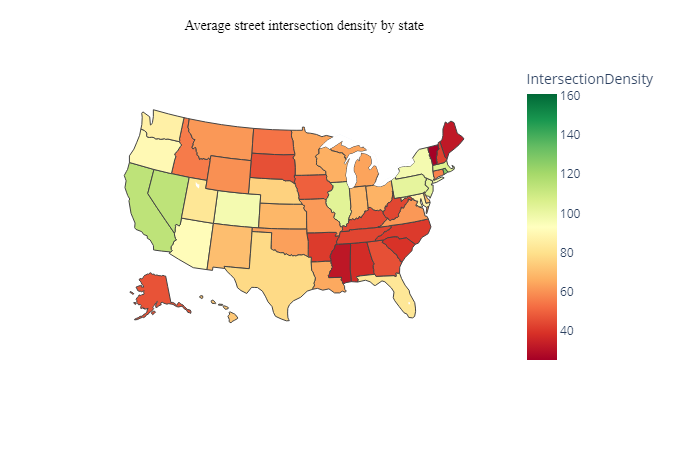

In [15]:
walkindex_fig = px.choropleth(walkability_df,
                    locations='STATEFP', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='IntersectionDensity',
                    color_continuous_scale="RdYlGn", 
                    )
walkindex_fig.update_layout(
      title_text = 'Average street intersection density by state',
      title_font_family="Times New Roman",
      title_font_size = 14,
      title_font_color="black", 
      title_x=0.45, 
         )
walkindex_fig.show()

Image(filename="images/IntersectionDensity.png")

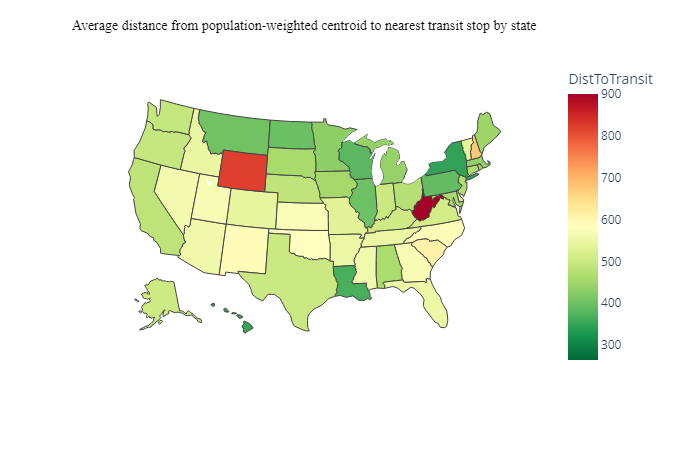

In [16]:
walkindex_fig = px.choropleth(walkability_df,
                    locations='STATEFP', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='DistToTransit',
                    color_continuous_scale="RdYlGn_r", 
                    )
walkindex_fig.update_layout(
      title_text = 'Average distance from population-weighted centroid to nearest transit stop by state',
      title_font_family="Times New Roman",
      title_font_size = 14,
      title_font_color="black", 
      title_x=0.45, 
         )
walkindex_fig.show()

Image(filename="images/AvgDistTransit.png")

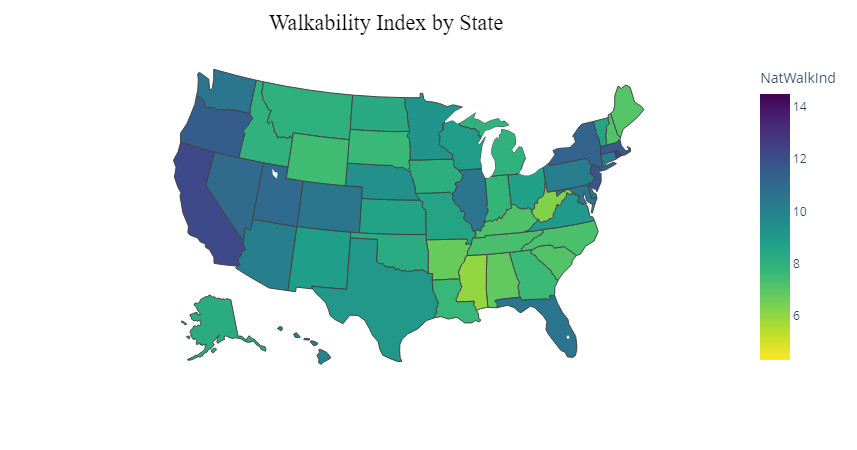

In [17]:
walkindex_fig = px.choropleth(walkability_df,
                    locations='STATEFP', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='NatWalkInd',
                    color_continuous_scale="Viridis_r", 
                    )
walkindex_fig.update_layout(
      title_text = 'Walkability Index by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
walkindex_fig.show()

Image(filename="images/Walkability.png")

In [18]:
walkability_df.sort_values(by="NatWalkInd", ascending=False).head()

,STATEFP,EmploymentMix,IntersectionDensity,DistToTransit,1/4MileToTransit,1/2MileToTransit,JobsWithin45MinTransit,PopWithin45MinTransit,NatWalkInd
7,DC,0.500691,160.734818,263.704391,0.404095,0.704895,442742.006682,247796.115813,14.471481
40,RI,0.592975,126.632724,455.243699,0.172594,0.342470,52852.815000,38545.235000,12.587935
4,CA,0.571791,113.788509,482.944305,0.319048,0.524269,160437.732082,114664.596189,12.224970
31,NJ,0.575140,102.005886,468.860857,0.267023,0.493599,219919.579587,106931.640431,11.868249
19,MA,0.574930,105.232940,435.624733,0.351638,0.559090,167450.349462,102755.824373,11.627215


In [19]:
walkability_df.sort_values(by="NatWalkInd", ascending=True).head()

,STATEFP,EmploymentMix,IntersectionDensity,DistToTransit,1/4MileToTransit,1/2MileToTransit,JobsWithin45MinTransit,PopWithin45MinTransit,NatWalkInd
47,VI,NaN,83.815418,NaN,NaN,NaN,NaN,NaN,4.322097
39,PR,NaN,100.895670,NaN,0.326598,0.623589,NaN,NaN,4.618350
25,MS,0.514220,31.782410,559.224711,NaN,NaN,23797.300813,8108.691057,6.004544
51,WV,0.562505,43.783686,900.162000,0.104511,0.267417,1875.200000,1343.400000,6.285385
2,AR,0.547573,41.377094,549.742464,0.195120,0.338690,26965.943396,10081.834906,6.722559


Most Southern states have pretty low intersection density. The top states in contrast are California, Nevada, and Rhode Island. 

There are a few notable outliers for distance from population-weighted centroids to nearest transit stop: Wyoming and West Virginia. Perhaps they don't have that much transportation, or it's concentrated in one part of the state? The top states, so lowest distance, are New York, Louisiana, and Hawaii.

Small states seem to have higher walkability indices, with California a notable outlier in size among the top 5.

# Ridership

We already cleaned and calculated miles per person(total miles/population) and trips per person(total trips/population). So we want to plot this by state, but as we learned in class traditional statistics are not really applicable to geospatial data, so we plot this data on a Choropleth map, which is useful for seeing visual patterns.  

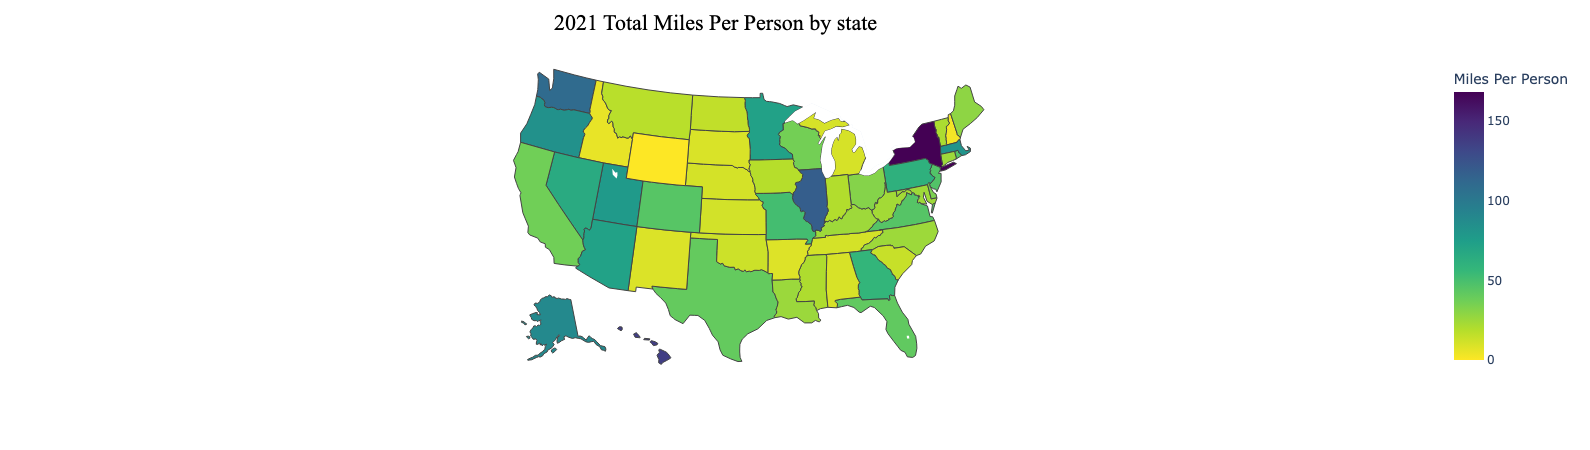

In [20]:
ridership_fig = px.choropleth(ridership_df,
                    locations='HQ State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Miles Per Person',
                    color_continuous_scale="Viridis_r", 
                    )
ridership_fig.update_layout(
      title_text = '2021 Total Miles Per Person by state',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
ridership_fig.show()
Image(filename="images/MPP.png")

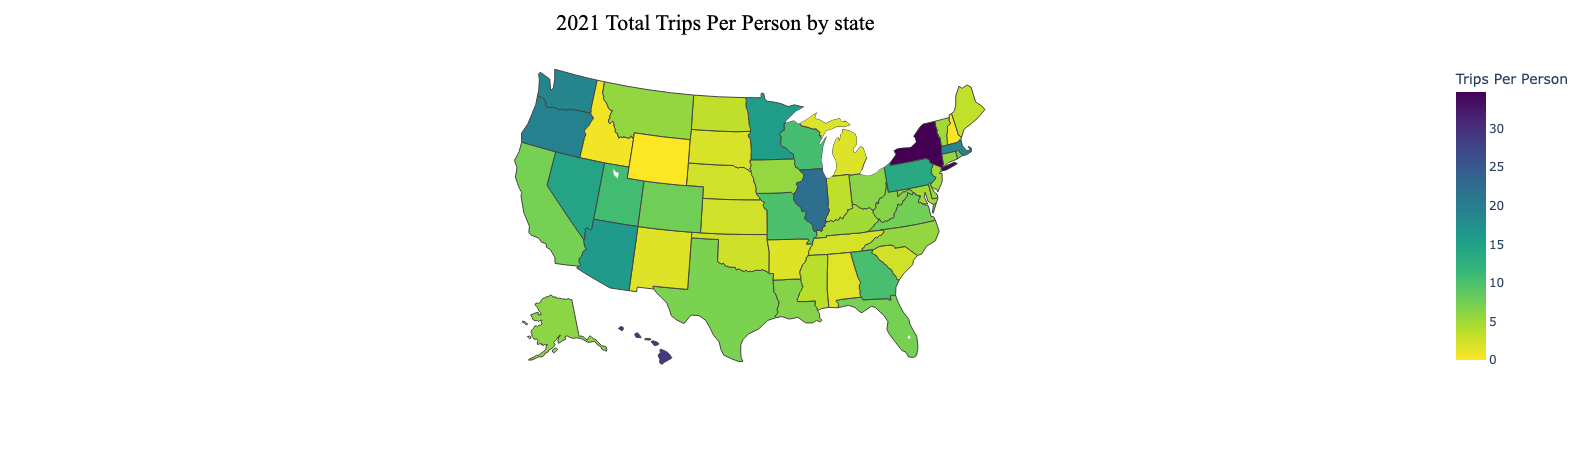

In [21]:
ridership_fig = px.choropleth(ridership_df,
                    locations='HQ State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Trips Per Person',
                    color_continuous_scale="Viridis_r", 
                    )
ridership_fig.update_layout(
      title_text = '2021 Total Trips Per Person by state',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
ridership_fig.show()
Image(filename="images/TPP.png")

As we can see, trips per person and miles per person roughly line up, states like NY seem to have a lot more public transportation usage (which makes sense), and it is an outlier on both graphs, meaning they correspond, which makes sense as well. Overall, we can see that some states have more transportation usage than others, like NY, and we can sort of visualize the distribution by state. 